<a href="https://colab.research.google.com/github/Achieng45/Machine-Learning/blob/main/officesize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [459]:
pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [430]:
from faker import Faker
import faker.providers
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as px
import matplotlib.pyplot as go
import matplotlib.pyplot as trendline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime
import random 
fake=Faker()

In [431]:
from numpy.ma.core import array

def imbalanced_data(num=100, seed=None):
  np.random.seed(seed)
  fake.seed_instance(seed)
  

  
  output=[
          {
             "size":np.random.normal(5,2,10)[0],
             #"size":np.random.lognormal(500),
             "price":np.random.normal(10,5,9)[0],
             "predicted_price":np.random.normal(9,9,9)[0],
             
              
             
          }
          for i in range(num)
  ]
  return output

In [432]:
 
df= pd.DataFrame(imbalanced_data(num=100,seed=0))
df

,size,price,predicted_price
0,8.528105,10.720218,1.313138
1,8.065558,8.063366,15.997413
2,5.133034,1.849008,2.836709
3,7.976504,11.781832,17.724570
4,3.277549,11.491191,13.853243
...,...,...,...
95,4.590079,6.098601,3.658317
96,4.189055,16.521069,2.371579
97,2.538908,13.399720,23.425773
98,6.964654,9.715105,19.888535


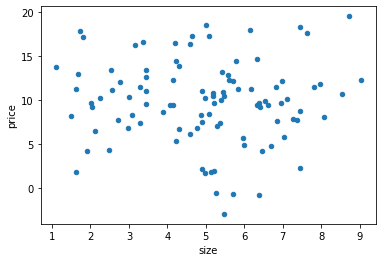

In [433]:
df.plot(kind="scatter",x="size",y="price")#x and y should be equal to plot scatter


In [434]:
sized=pd.DataFrame(df['size'])
priced=pd.DataFrame(df['price'])

In [435]:
linear_reg=linear_model.LinearRegression()
#added
model=linear_reg.fit(sized,priced)
##model=linear_reg.fit(sized,priced)

In [436]:
m=model.coef_
m

array([[-0.06600729]])

In [437]:
c=model.intercept_
c

array([10.12648662])

In [438]:
model.score(sized,priced)

0.0007046250609652471

In [439]:
#y=m*x+b
-0.09323722*100+10.73847667


1.4147546700000007

In [440]:
x=pd.DataFrame(df['price'])
mse=sum([(x-df['predicted_price']**2)*1/len(df)for x in df['price']])
df_mse=pd.DataFrame({'size':df['size'],'price':df['size'],'predicted price':df['predicted_price'],'MSE':mse})
df_mse



,size,price,predicted price,MSE
0,8.528105,8.528105,1.313138,8.076506
1,8.065558,8.065558,15.997413,-246.116390
2,5.133034,5.133034,2.836709,1.753920
3,7.976504,7.976504,17.724570,-304.359556
4,3.277549,3.277549,13.853243,-182.111495
...,...,...,...,...
95,4.590079,4.590079,3.658317,-3.582446
96,4.189055,4.189055,2.371579,4.176450
97,2.538908,2.538908,23.425773,-538.965986
98,6.964654,6.964654,19.888535,-385.752986


In [441]:
def mse(n,y,predicted_y):
  return sum([(x-df['predicted_price']**2)*1/len(df)for x in df['price']])

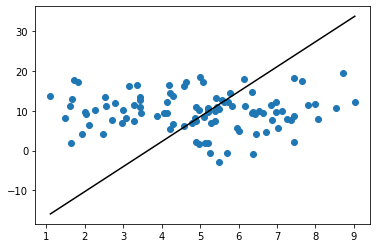

In [442]:
x=df['size']
y=df['price']
Fig=px.scatter(x,y)
Fig=px.plot([min(x),max(x)],[min(df['predicted_price']),max(df['predicted_price'])],color='black')





In [443]:
L=0.001
n=float(len(x))
epoch=2
epoch_error_list=[]
epoch_count_list=[]

predicted_y=df['predicted_price'].iloc[3]
predicted_y
  
   



17.7245703734221

In [458]:
def gradient_descent_fit(m,c,n,L):
 epoch_error_list=[]
 epoch_count_list=[]
 for i in range(epoch):
    predicted_y=m*x+c
    epoch_count_list=epoch_count_list[:]
    epoch_count_list.append(i)
    epoch_error=mse(n,y,predicted_y)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)
    d_m = (-2/n) * sum(x*(y-predicted_y))
    d_c = (-2/n) * sum(y-predicted_y)
    m=m-L*d_m
    c=c-L*d_c
 print(m,c)
 return predicted_y,epoch_count_list,epoch_error_list
 